In [22]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)


In [23]:
import glob
import pandas as pd
name = glob.glob('../data/names/yob200*')
name_list=[]
year= 2000

for data in name:
    df= pd.read_csv(data,sep=',', names=['name','gender','id'])
    df['year']=year
    year +=1
    name_list.append(df)

name_df= pd.concat(name_list)
name_df

,name,gender,id,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000
...,...,...,...,...
34704,Zyquarius,M,5,2009
34705,Zyran,M,5,2009
34706,Zyreion,M,5,2009
34707,Zyrian,M,5,2009


In [40]:
total_df= name_df.groupby('gender')['id'].sum()
female = total_df[0]
male = total_df[1]
labels=[f'여({female})',f'남({male})',]


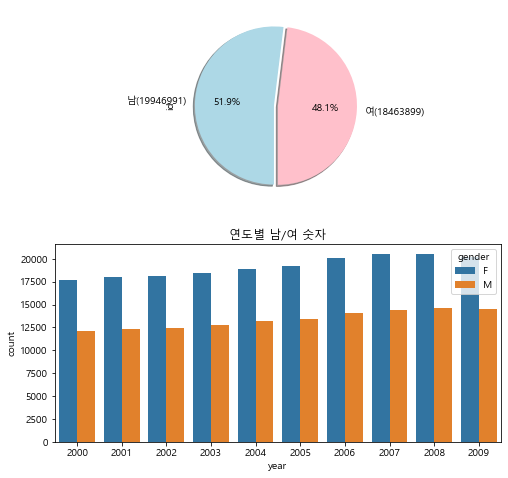

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(2,1, figsize=(8,8))

total_df.plot.pie(explode=[0,0.05],colors=['pink','lightblue'], ax=ax[0],labels=labels,startangle=-90, shadow=True,  autopct='%1.1f%%')

ax[1] = sns.countplot('year',data=name_df,hue='gender')
ax[1].set_title('연도별 남/여 숫자')
ax[1].set_xlabel('year')
ax[1].set_ylabel('count')

plt.show()